# Diamond dataset

> Data preprocessing - November 2024
>
> NEC First Assignment - Universitat Rovira i Virgili
>
> *Andrea Pujals Bocero*

### Workflow
* Import libraries
* Loading dataset
* Data cleaning
* Encode categorical features
* Normalize/scale numerical features
* Split data

### Import libraries

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading dataset

In [130]:
df = pd.read_csv("C:/Users/Andrea/PycharmProjects/NEC/Activity-1/data/diamonds.csv")
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [131]:
df.tail(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### Data cleaning

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


The first column it is an ID, which does not provide any representative value. Let's delete the first column called (Unnamed: 0)
- axis=1--> for removing column
- axis=0--> for removing row 

In [133]:
df = df.drop(['Unnamed: 0'],axis = 1)
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Look for inconsistent data such null values

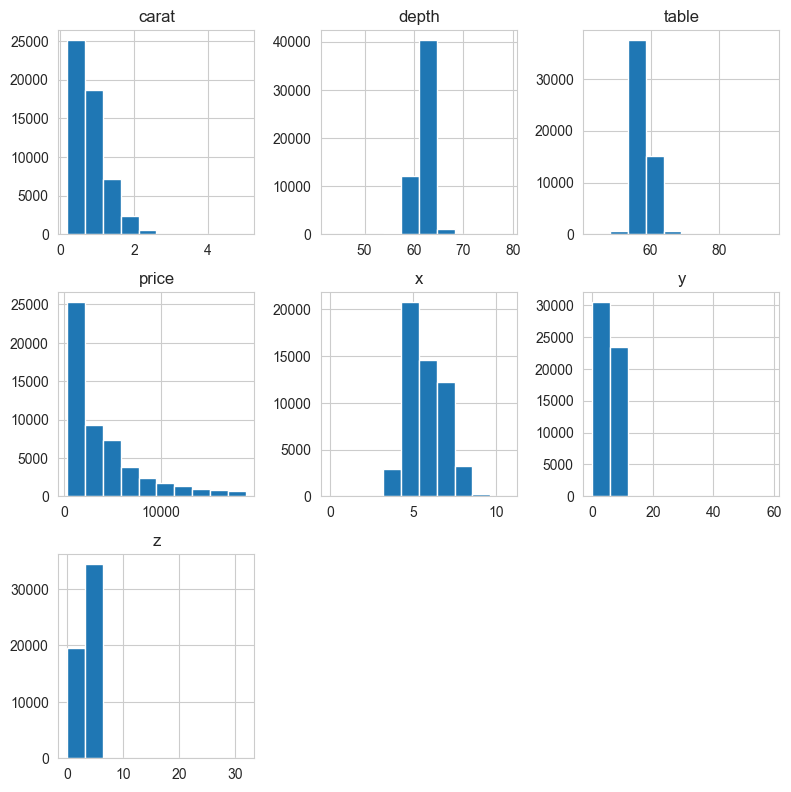

In [134]:
# Plot the distribution of the data for all the columns
df.hist(figsize=(8, 8))  # You can adjust the figsize to your preference
plt.tight_layout(pad=1.0)   # Add more space between the figures
plt.show()

In [135]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In the min value of x,y,z there are some zeros. This indicates that there are faulty values in data that represents dimensionless or 
2D diamonds. For instance, features derived from x, y, z will also be invalid if these dimensions are zero. So we need to filter this faulty values. Including such faulty data in the analysis or model training can introduce significant noise, lead to poor model performance.

In [136]:
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)].copy()
df = df.reset_index(drop=True)
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Encode categorical features
Ordinal encoding maps each category to a numeric rank based on its order.
* cut: Fair, Good, Very Good, Premium, Ideal
* color: J (worst), I, H, G, F, E, D (best)
* clarity: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

In [137]:
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
df['cut'] = df['cut'].map(cut_mapping)

color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
df['color'] = df['color'].map(color_mapping)

clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
df['clarity'] = df['clarity'].map(clarity_mapping)

df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


### Normalize/scale numerical features
Normalize the numerical columns (carat, depth, table, price, x, y, z) to ensure they are on a similar scale.

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.124262,0.726057,0.567662,0.435929,0.520820,0.278016,0.194896,0.285539,0.037213,0.080379
std,0.098502,0.279145,0.283545,0.235286,0.039787,0.042963,0.215564,0.159689,0.020647,0.022861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.500000,0.333333,0.285714,0.500000,0.250000,0.033681,0.139800,0.018834,0.059876
50%,0.103950,0.750000,0.500000,0.428571,0.522222,0.269231,0.112180,0.281027,0.036762,0.080052
75%,0.174636,1.000000,0.833333,0.571429,0.541667,0.307692,0.270165,0.400856,0.051793,0.096648
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split data
Split data into 80% for train and 20% for test

In [139]:
from sklearn.model_selection import train_test_split
x = df.drop(['price'], axis=1)  # Features
y = df['price']                # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#print the training and testing sets shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(43136, 9) (43136,)
(10784, 9) (10784,)


Reshape the target to 2D array

In [140]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(43136, 9) (43136, 1)
(10784, 9) (10784, 1)


### Save dataset
Save the cleaned dataset to a CSV file

In [141]:
df.to_csv("C:/Users/Andrea/PycharmProjects/NEC/Activity-1/data/preprocessed_diamonds.csv", index=False)